[View in Colaboratory](https://colab.research.google.com/github/Thanatoz-1/WordEmbedding-Modelling/blob/master/EnglishEmbeddings.ipynb)

In [0]:
!git clone https://github.com/AmmarRashed/word_embeddings_hp.git
!mv ./word_embeddings_hp/data/ ./
!wget "https://raw.githubusercontent.com/llSourcell/word_vectors_game_of_thrones-LIVE/master/data/got1.txt" "https://raw.githubusercontent.com/llSourcell/word_vectors_game_of_thrones-LIVE/master/data/got2.txt" "https://raw.githubusercontent.com/llSourcell/word_vectors_game_of_thrones-LIVE/master/data/got3.txt" "https://raw.githubusercontent.com/llSourcell/word_vectors_game_of_thrones-LIVE/master/data/got4.txt" "https://raw.githubusercontent.com/llSourcell/word_vectors_game_of_thrones-LIVE/master/data/got5.txt"
!mv *.txt ./data/
!ls ./data

In [0]:
!pip install gensim

In [0]:
import os
import re
import bs4
import pandas as pd
import numpy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn
import sklearn
import keras
import gensim
import seaborn as sns
import nltk
nltk.download('punkt')
nltk.download('stopwords')

In [117]:
sentences=[]
for i in sorted(os.listdir('./data')):
  print(i)
  with open(os.path.join('./data',i)) as f:
    temp=f.readlines()
    sentences+=temp

for i,sentence in enumerate(sentences):
  sentences[i]=re.sub("[^ a-zA-Z.]", "", sentence).lower()

1342-0.txt
got1.txt
got2.txt
got3.txt
got4.txt
got5.txt
hp1.txt
hp2.txt
hp3.txt
hp4.txt
hp5.txt
hp6.txt
hp7.txt
pg16328.txt
pg1661.txt


In [0]:
dataset=[]
for sentence in sentences:
  for i in gensim.summarization.textcleaner.get_sentences(sentence):
    dataset+=[i]

In [0]:
stopwords = nltk.corpus.stopwords.words('english')

In [0]:
sentences=[]
for sentence in dataset:
  sentences.append([i for i in gensim.summarization.textcleaner.tokenize_by_word(sentence)])


In [0]:
dataset=[]  
for i, words in enumerate(sentences):
  dataset.append([i for i in words if not i in stopwords])

In [122]:
import logging
logging.basicConfig(format='%(asctime)s: %(message)s', level=logging.INFO)

num_features = 100    # Word vector dimensionality                      
min_word_count = 40   # Minimum word count                        
num_workers = 2       # Number of threads to run in parallel
context = 10          # Context window size                                                                                    
downsampling = 1e-3   # Downsample setting for frequent words

from gensim.models import word2vec
print("Training model...")
model = word2vec.Word2Vec(dataset, 
                          workers=num_workers,
                          size=num_features, 
                          min_count = min_word_count, 
                          window = context, 
                          sample = downsampling
                         )

# If you don't plan to train the model any further, calling 
# init_sims will make the model much more memory-efficient.
model.init_sims(replace=True)

# It can be helpful to create a meaningful model name and 
# save the model for later use. You can load it later using Word2Vec.load()
model_name = "300features_40minwords_10context.w2v"
model.save(model_name)

2018-09-01 20:03:15,007: collecting all words and their counts
2018-09-01 20:03:15,009: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-09-01 20:03:15,032: PROGRESS: at sentence #10000, processed 37114 words, keeping 5666 word types
2018-09-01 20:03:15,054: PROGRESS: at sentence #20000, processed 84665 words, keeping 10647 word types
2018-09-01 20:03:15,084: PROGRESS: at sentence #30000, processed 144666 words, keeping 14459 word types
2018-09-01 20:03:15,115: PROGRESS: at sentence #40000, processed 203335 words, keeping 16454 word types
2018-09-01 20:03:15,142: PROGRESS: at sentence #50000, processed 261162 words, keeping 18186 word types
2018-09-01 20:03:15,168: PROGRESS: at sentence #60000, processed 319812 words, keeping 19448 word types
2018-09-01 20:03:15,194: PROGRESS: at sentence #70000, processed 377629 words, keeping 20539 word types


Training model...


2018-09-01 20:03:15,237: PROGRESS: at sentence #80000, processed 432528 words, keeping 21346 word types
2018-09-01 20:03:15,269: PROGRESS: at sentence #90000, processed 492498 words, keeping 22589 word types
2018-09-01 20:03:15,301: PROGRESS: at sentence #100000, processed 552983 words, keeping 23550 word types
2018-09-01 20:03:15,331: PROGRESS: at sentence #110000, processed 612551 words, keeping 24335 word types
2018-09-01 20:03:15,361: PROGRESS: at sentence #120000, processed 672680 words, keeping 25338 word types
2018-09-01 20:03:15,391: PROGRESS: at sentence #130000, processed 728354 words, keeping 25977 word types
2018-09-01 20:03:15,420: PROGRESS: at sentence #140000, processed 785881 words, keeping 26576 word types
2018-09-01 20:03:15,448: PROGRESS: at sentence #150000, processed 840397 words, keeping 27032 word types
2018-09-01 20:03:15,479: PROGRESS: at sentence #160000, processed 904213 words, keeping 27544 word types
2018-09-01 20:03:15,509: PROGRESS: at sentence #170000, p

In [130]:
model.most_similar('khaleesi')

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[(u'noble', 0.8408200740814209),
 (u'highborn', 0.8328500986099243),
 (u'loraq', 0.8273093104362488),
 (u'beowulf', 0.8162523508071899),
 (u'magnificence', 0.8147472143173218),
 (u'maegi', 0.8057722449302673),
 (u'traitors', 0.8037667870521545),
 (u'servant', 0.8016566634178162),
 (u'freed', 0.7997417449951172),
 (u'daenerys', 0.7994450330734253)]

In [0]:
import sklearn.manifold
tsne = sklearn.manifold.TSNE(n_components=2, random_state=0)
all_word_vectors_matrix = model.wv.vectors
all_word_vectors_matrix_2d = tsne.fit_transform(all_word_vectors_matrix)

In [0]:
points = pd.DataFrame(
    [
        (word, coords[0], coords[1])
        for word, coords in [
            (word, all_word_vectors_matrix_2d[model.wv.vocab[word].index])
            for word in model.wv.vocab
        ]
    ],
    columns=["word", "x", "y"]
)

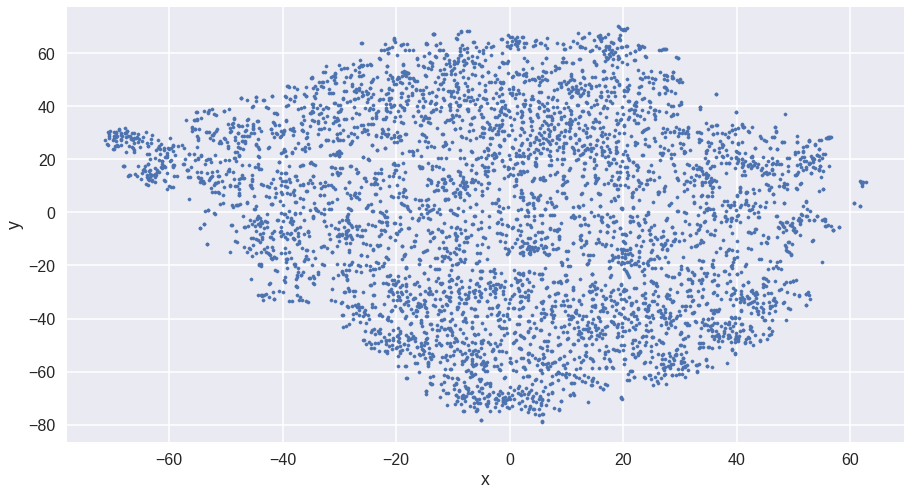

In [127]:
sns.set_context("poster")
points.plot.scatter("x", "y", s=10, figsize=(15, 8))